<a href="https://www.kaggle.com/code/muradpitafi/facebook-posts-used-kmeans?scriptVersionId=152844663" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/facebook-live-sellers-in-thailand-uci-ml-repo/Live.csv


In [2]:
data = pd.read_csv("/kaggle/input/facebook-live-sellers-in-thailand-uci-ml-repo/Live.csv")
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [3]:
data.drop(['Column1','Column2','Column3','Column4','status_id', 'status_published'], axis = 1, inplace= True)

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['status_type'] = encoder.fit_transform(data[['status_type']])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
x = data
y = data['status_type']

In [6]:
data.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for i in data.columns:
    data[i]= scaler.fit_transform(data[[i]])

In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)
km.fit(x)
km.inertia_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


237.75726404419567

In [9]:
wcss= []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter =300,
                   n_init=10,
                   random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [10]:
print(wcss)

[899.1609334281574, 237.75726404419567, 161.59633400033618, 127.31313212987801, 96.24989550305192, 82.47515136223973, 73.25916430630406, 66.62852853993775, 61.15931314225929, 57.310557421125075]


In [11]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', 
                    max_iter =300,
                   n_init=10,
                   random_state=0)
y_kmeans = kmeans.fit_predict(x)

In [12]:
print(y_kmeans)

[1 0 1 ... 0 0 0]


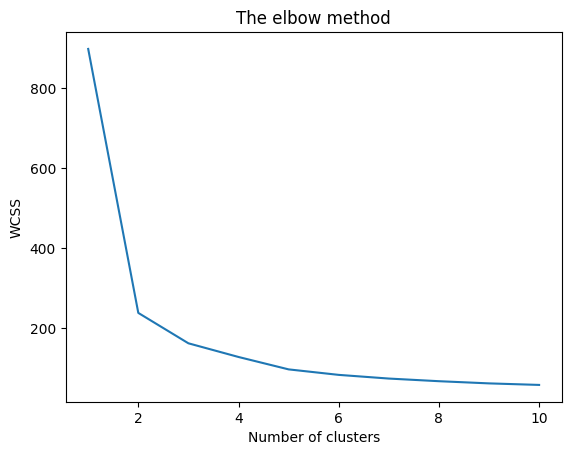

In [13]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [14]:
from sklearn.metrics import adjusted_rand_score
ari  = adjusted_rand_score(y , y_kmeans)
print(ari)

0.850354088906488
